In [1]:
import pandas as pd

df = pd.read_csv("final_food_delivery_dataset.csv")
df.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18/02/2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18/01/2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15/07/2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04/10/2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25/12/2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


In [2]:
df.info()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           10000 non-null  int64  
 1   user_id            10000 non-null  int64  
 2   restaurant_id      10000 non-null  int64  
 3   order_date         10000 non-null  object 
 4   total_amount       10000 non-null  float64
 5   restaurant_name_x  10000 non-null  object 
 6   name               10000 non-null  object 
 7   city               10000 non-null  object 
 8   membership         10000 non-null  object 
 9   restaurant_name_y  10000 non-null  object 
 10  cuisine            10000 non-null  object 
 11  rating             10000 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 937.6+ KB


Index(['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount',
       'restaurant_name_x', 'name', 'city', 'membership', 'restaurant_name_y',
       'cuisine', 'rating'],
      dtype='object')

In [3]:
df.shape


(10000, 12)

In [4]:
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")
df.columns


Index(['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount',
       'restaurant_name_x', 'name', 'city', 'membership', 'restaurant_name_y',
       'cuisine', 'rating'],
      dtype='object')

In [5]:
df.isnull().sum()


order_id             0
user_id              0
restaurant_id        0
order_date           0
total_amount         0
restaurant_name_x    0
name                 0
city                 0
membership           0
restaurant_name_y    0
cuisine              0
rating               0
dtype: int64

In [6]:
df.dropna(inplace=True)


In [7]:
df['order_date'] = pd.to_datetime(df['order_date'])


C:\Users\HP\AppData\Local\Temp\ipykernel_17176\2660814267.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['order_date'] = pd.to_datetime(df['order_date'])


In [8]:
df['quarter'] = df['order_date'].dt.to_period('Q')


In [9]:
df['rating_range'] = pd.cut(
    df['rating'],
    bins=[0, 3.5, 4.0, 4.5, 5.0],
    labels=['3.0-3.5', '3.6-4.0', '4.1-4.5', '4.6-5.0']
)


In [10]:
df.groupby('city')['total_amount'].sum().sort_values(ascending=False)


city
Bangalore    2206946.58
Chennai      1990513.03
Pune         1924797.93
Hyderabad    1889366.58
Name: total_amount, dtype: float64

In [11]:
df.groupby('membership')['total_amount'].sum()


membership
Gold       3975364.89
Regular    4036259.23
Name: total_amount, dtype: float64

In [12]:
df.groupby('cuisine')['total_amount'].mean().sort_values(ascending=False)


cuisine
Mexican    808.021344
Italian    799.448578
Indian     798.466011
Chinese    798.389020
Name: total_amount, dtype: float64

In [13]:
df['city'].value_counts()


city
Bangalore    2751
Chennai      2469
Pune         2430
Hyderabad    2350
Name: count, dtype: int64

In [14]:
df[df['membership']=='Gold'] \
  .groupby('city')['total_amount'] \
  .sum() \
  .sort_values(ascending=False)


city
Chennai      1080909.79
Pune         1003012.32
Bangalore     994702.59
Hyderabad     896740.19
Name: total_amount, dtype: float64

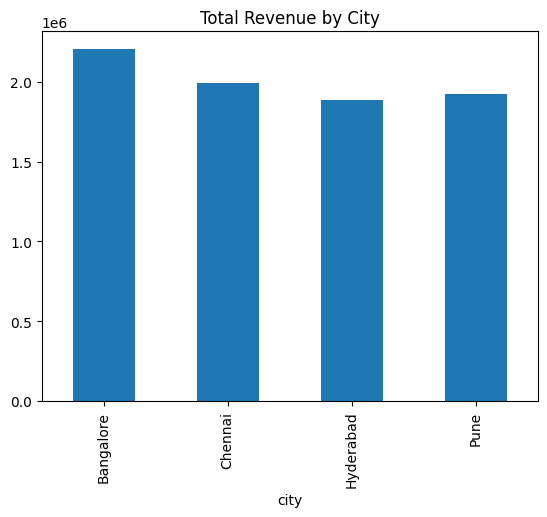

In [15]:
import matplotlib.pyplot as plt

df.groupby('city')['total_amount'].sum().plot(kind='bar')
plt.title("Total Revenue by City")
plt.show()


In [16]:
df[df['membership'] == 'Gold'] \
  .groupby('city')['total_amount'] \
  .sum() \
  .sort_values(ascending=False)


city
Chennai      1080909.79
Pune         1003012.32
Bangalore     994702.59
Hyderabad     896740.19
Name: total_amount, dtype: float64

In [17]:
df[df['membership']=='Gold']['city'].value_counts()


city
Chennai      1337
Pune         1284
Bangalore    1254
Hyderabad    1112
Name: count, dtype: int64

In [18]:
# Average order value by cuisine
avg_order_value = (
    df.groupby('cuisine')['total_amount']
      .mean()
      .sort_values(ascending=False)
)

avg_order_value


cuisine
Mexican    808.021344
Italian    799.448578
Indian     798.466011
Chinese    798.389020
Name: total_amount, dtype: float64

In [19]:
avg_order_value.head(3)


cuisine
Mexican    808.021344
Italian    799.448578
Indian     798.466011
Name: total_amount, dtype: float64

In [20]:
# Step 1: Total spend per user
user_total_spend = df.groupby('user_id')['total_amount'].sum()

# Step 2: Users whose total spend > 1000
high_value_users = user_total_spend[user_total_spend > 1000]

# Step 3: Count distinct users
high_value_users.count()


np.int64(2544)

In [21]:
df.groupby('user_id')['total_amount'].sum().gt(1000).sum()


np.int64(2544)

In [22]:
df.groupby('rating_range')['total_amount'] \
  .sum() \
  .sort_values(ascending=False)


C:\Users\HP\AppData\Local\Temp\ipykernel_17176\3740409610.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('rating_range')['total_amount'] \


rating_range
4.6-5.0    2197030.75
3.0-3.5    2136772.70
4.1-4.5    1960326.26
3.6-4.0    1717494.41
Name: total_amount, dtype: float64

In [23]:
df[df['membership'] == 'Gold'] \
  .groupby('city')['total_amount'] \
  .mean() \
  .sort_values(ascending=False)


city
Chennai      808.459080
Hyderabad    806.421034
Bangalore    793.223756
Pune         781.162243
Name: total_amount, dtype: float64

In [25]:
df.groupby('cuisine')['total_amount'] \
  .sum() \
  .sort_values(ascending=False)


cuisine
Mexican    2085503.09
Italian    2024203.80
Indian     1971412.58
Chinese    1930504.65
Name: total_amount, dtype: float64

In [26]:
gold_orders = df[df['membership'] == 'Gold'].shape[0]
total_orders = df.shape[0]

round((gold_orders / total_orders) * 100)


50

In [27]:
df.groupby(['membership', 'cuisine'])['total_amount'] \
  .sum() \
  .sort_values(ascending=False)


membership  cuisine
Regular     Mexican    1072943.30
            Italian    1018424.75
Gold        Mexican    1012559.79
            Italian    1005779.05
Regular     Indian      992100.27
Gold        Indian      979312.31
            Chinese     977713.74
Regular     Chinese     952790.91
Name: total_amount, dtype: float64

In [29]:
print(df.columns)


Index(['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount',
       'restaurant_name_x', 'name', 'city', 'membership', 'restaurant_name_y',
       'cuisine', 'rating', 'quarter', 'rating_range'],
      dtype='object')


In [30]:
# Using restaurant_name_x
restaurant_stats = df.groupby('restaurant_name_x').agg(
    avg_order_value=('total_amount', 'mean'),
    total_orders=('order_id', 'count')
)

result = restaurant_stats[restaurant_stats['total_orders'] < 20].sort_values(
    'avg_order_value', ascending=False
)

print(result)


                                   avg_order_value  total_orders
restaurant_name_x                                               
Hotel Dhaba Multicuisine               1040.222308            13
Sri Mess Punjabi                       1029.180833            12
Ruchi Biryani Punjabi                  1002.140625            16
Sri Delights Pure Veg                   989.467222            18
Classic Kitchen Family Restaurant       973.167895            19
...                                            ...           ...
Annapurna Tiffins Punjabi               621.828947            19
Darbar Tiffins Non-Veg                  596.815556            18
Darbar Restaurant Punjabi               589.972857            14
Spice Tiffins Pure Veg                  578.578667            15
Ruchi Mess Punjabi                      572.686471            17

[170 rows x 2 columns]


In [31]:
# Group by restaurant
restaurant_stats = df.groupby('restaurant_name_x').agg(
    avg_order_value=('total_amount', 'mean'),
    total_orders=('order_id', 'count')
)

# Filter restaurants with less than 20 orders
filtered = restaurant_stats[restaurant_stats['total_orders'] < 20]

# Sort by average order value descending
result = filtered.sort_values('avg_order_value', ascending=False)

print(result.head(1))  # This shows the restaurant with the highest avg_order_value


                          avg_order_value  total_orders
restaurant_name_x                                      
Hotel Dhaba Multicuisine      1040.222308            13


In [32]:
df.groupby('quarter')['total_amount'] \
  .sum() \
  .sort_values(ascending=False)


quarter
2023Q3    2037385.10
2023Q4    2018263.66
2023Q1    1993425.14
2023Q2    1945348.72
2024Q1      17201.50
Freq: Q-DEC, Name: total_amount, dtype: float64

In [33]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['quarter'] = df['order_date'].dt.to_period('Q')


In [34]:
gold_orders = df[df['membership'] == 'Gold']['order_id'].count()
print(gold_orders)


4987


In [35]:
hyderabad_revenue = df[df['city'] == 'Hyderabad']['total_amount'].sum()
hyderabad_revenue = round(hyderabad_revenue)
print(hyderabad_revenue)


1889367


In [36]:
distinct_users = df['user_id'].nunique()
print(distinct_users)


2883


In [37]:
avg_gold_order = df[df['membership'] == 'Gold']['total_amount'].mean()
avg_gold_order = round(avg_gold_order, 2)
print(avg_gold_order)


797.15


In [38]:
high_rating_orders = df[df['rating'] >= 4.5]['order_id'].count()
print(high_rating_orders)


3374


In [39]:
# Filter Gold members
gold_df = df[df['membership'] == 'Gold']

# Compute revenue by city
top_city = gold_df.groupby('city')['total_amount'].sum().idxmax()

# Count orders in that city
orders_top_city = gold_df[gold_df['city'] == top_city]['order_id'].count()
print(orders_top_city)


1337
